In [23]:
#imports
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder

In [24]:
url = 'marketing_customer_analysis_clean (3).csv'
df = pd.read_csv(url)

In [25]:
#retrieves the categorical and numerical data types
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

In [26]:
#Displays the columns in the DF 
numericals_df.columns

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'month'],
      dtype='object')

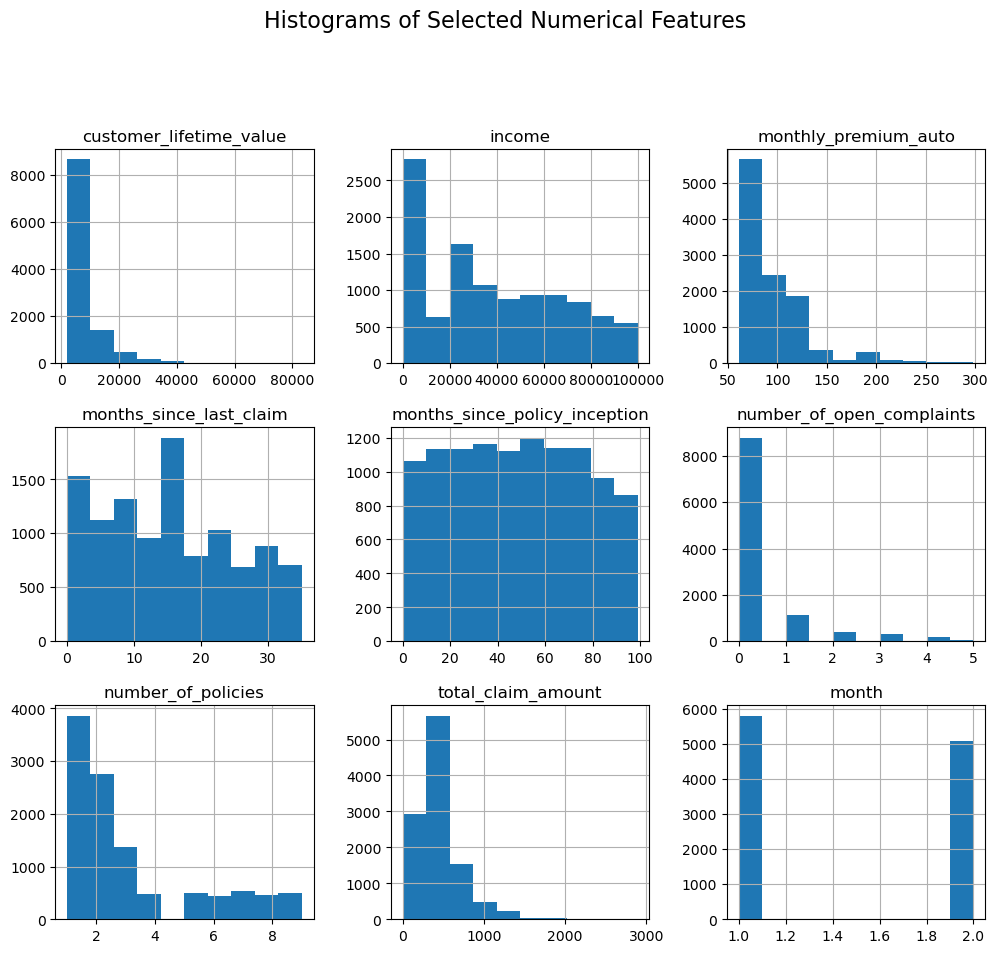

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Display histograms for specific numerical columns
selected_columns = ["customer_lifetime_value", "income", "monthly_premium_auto",
                    "months_since_last_claim", "months_since_policy_inception",
                    "number_of_open_complaints", "number_of_policies",
                    "total_claim_amount", "month"]



#.hist() is a pandas method used to plot histograms for the selected columns.
#bins=10 specifies the number of bins (intervals) for each histogram.
#figsize=(12, 10) sets the size of the overall figure to be 12 units wide and 10 units high.
#layout=(3, 3) indicates that the histograms should be arranged in a 3x3 grid (3 rows, 3 columns).
#sharex=False ensures that each subplot has its own x-axis.
numericals_df[selected_columns].hist(bins=10, figsize=(12, 10), layout=(3, 3), sharex=False)

#plt.suptitle() is a Matplotlib function used to add a centered title to the entire figure.
#The title is set to 'Histograms of Selected Numerical Features'.
#y=1.02 adjusts the vertical position of the title, placing it slightly above the default position.
#fontsize=16 sets the font size of the title to 16 points.
plt.suptitle('Histograms of Selected Numerical Features', y=1.02, fontsize=16)

#Displays the histograms
plt.show()

In [28]:
#drop null values
numericals_df = numericals_df.dropna()

In [29]:
#drop duplicates
numericals_df = numericals_df.drop_duplicates()

In [30]:
#X-y split (y is the target variable, in this case, "total claim amount")
X = numericals_df[["unnamed:_0","customer_lifetime_value", "income", "monthly_premium_auto", "months_since_last_claim", "months_since_policy_inception","number_of_open_complaints","number_of_policies", "month"]]
y = numericals_df[["total_claim_amount"]]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [33]:
#retrieves the X-train DF; that trains the model
X_train.head()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
4716,4716,22217.967960,37553,187,34.0,7,0.0,2,2
8775,8775,8260.639809,33321,105,6.0,2,0.0,3,1
4754,4754,2269.841123,0,68,22.0,43,0.0,1,2
6569,6569,8869.631143,0,119,12.0,57,0.0,4,1
1438,1438,5002.093264,0,70,35.0,56,0.0,3,1


In [34]:
#Retrieves y_test DF; the test target
#Contains the actual target values.
y_test

,total_claim_amount
4829,475.423848
5081,350.400000
5011,482.400000
4625,673.342650
3838,302.400000
...,...
7450,460.266881
4715,405.883346
8581,41.182611
211,364.800000


array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

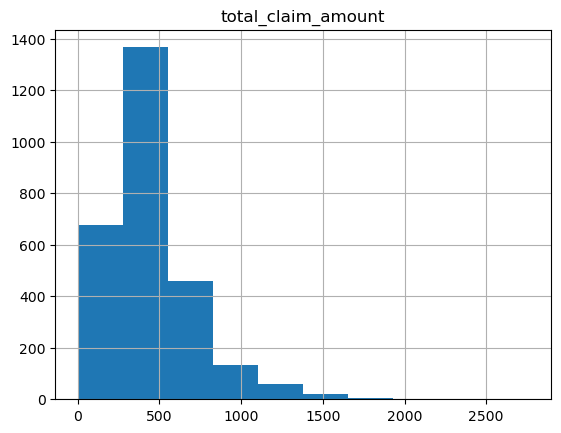

In [35]:
y_test.hist()

In [36]:
#Standardizes the data (after the data split!).
# This transforms each feature individually, scaling it based on the minimum and maximum values present in 
#that particular feature to get a range of values between [0,1]
scaler = MinMaxScaler()

#create the fit/frame
scaler = scaler.fit(X_train)


#transforms the data of X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.43233083, 0.24954704, 0.37560136, ..., 0.        , 0.125     ,
        1.        ],
       [0.80451128, 0.07813874, 0.33327332, ..., 0.        , 0.25      ,
        0.        ],
       [0.43581515, 0.00456644, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.49413167, 0.07310297, 0.        , ..., 0.        , 0.125     ,
        1.        ],
       [0.07876398, 0.03777879, 0.        , ..., 0.        , 0.25      ,
        1.        ],
       [0.66651385, 0.44404234, 0.        , ..., 0.        , 0.125     ,
        1.        ]])

array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

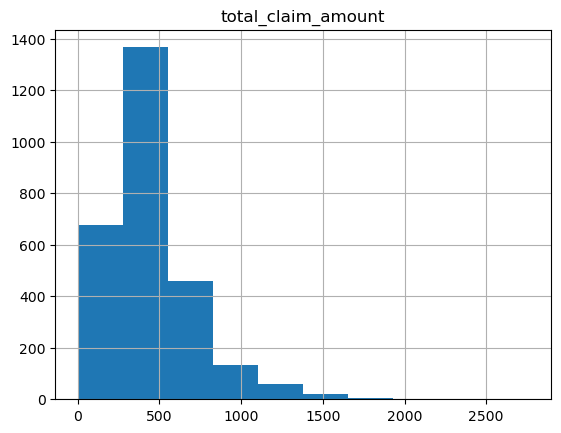

In [37]:
y_test.hist()

In [38]:
#Applying linear regression.
from sklearn.linear_model import LinearRegression

In [39]:
#Create and fit a linear regression model
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [40]:
#This displays the coefficient of all the X_train columns
model.coef_

array([[   6.01927432,  -50.62331362, -329.26455107, 1277.58373142,
           6.21138998,  -17.74720841,   -2.46967714,    2.33584909,
          -1.84174558]])

In [41]:
#displays the intercept
model.intercept_

array([390.97847183])

In [45]:
#Creating predictions for the test set
y_pred = model.predict(X_test)

# inputing y_pred into a df
y_pred = pd.DataFrame(y_pred)

#Displays the DF containing the predicted target values.
y_pred

,0
0,122.658353
1,350.524852
2,415.505553
3,433.532813
4,154.757902
...,...
2723,589.556165
2724,305.557792
2725,202.640217
2726,452.072707


In [46]:
#This resets the index of the y_test pandas Series and drops the old index. 
y_test = y_test.reset_index(drop = True)
y_test

,total_claim_amount
0,475.423848
1,350.400000
2,482.400000
3,673.342650
4,302.400000
...,...
2723,460.266881
2724,405.883346
2725,41.182611
2726,364.800000


In [47]:
#is using the concat function from pandas to concatenate two Series (or DataFrames) along the columns (axis=1). 
#This operation is often done to create a DataFrame that contains both the actual target values  
#(y_test) and the predicted values (y_pred), making it easier to analyze and visualize the residuals.
residuals_market_df = pd.concat([y_test, y_pred], axis = 1)
residuals_market_df

,total_claim_amount,0
0,475.423848,122.658353
1,350.400000,350.524852
2,482.400000,415.505553
3,673.342650,433.532813
4,302.400000,154.757902
...,...,...
2723,460.266881,589.556165
2724,405.883346,305.557792
2725,41.182611,202.640217
2726,364.800000,452.072707


In [48]:
# Rename columns
residuals_market_df = residuals_market_df.rename(columns = {"total_claim_amount":"y_test", 0:"y_pred"})

# This calculates the residuals and adds a new column named "residual" to the DataFrame
residuals_market_df["residual"] = residuals_market_df["y_test"] - residuals_market_df["y_pred"]

#Displays the residuals DF
residuals_market_df

,y_test,y_pred,residual
0,475.423848,122.658353,352.765495
1,350.400000,350.524852,-0.124852
2,482.400000,415.505553,66.894447
3,673.342650,433.532813,239.809837
4,302.400000,154.757902,147.642098
...,...,...,...
2723,460.266881,589.556165,-129.289284
2724,405.883346,305.557792,100.325554
2725,41.182611,202.640217,-161.457606
2726,364.800000,452.072707,-87.272707


In [49]:
#Displays the first few rows of the DataFrame residuals_market_df after adding the "residual" colum
residuals_market_df.head()

,y_test,y_pred,residual
0,475.423848,122.658353,352.765495
1,350.400000,350.524852,-0.124852
2,482.400000,415.505553,66.894447
3,673.342650,433.532813,239.809837
4,302.400000,154.757902,147.642098


In [50]:
#Calculating metrics

#This method calculates the mean of the values in the "residual" column, providing a single value that represents 
#the average error across all observations. 
mean_error = residuals_market_df["residual"].mean()

#Displays the result which is assigned to the variable mean_error.
mean_error

4.673648918980261

In [51]:
#imports two error metrics from scikit-learn with abbreviated names:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [52]:
#This uses the mean squared error (MSE) function from scikit-learn to calculate the mean squared difference between 
#the actual target values (y_test) and the predicted values (y_pred).
mse(y_test, y_pred)

40504.749875483714

In [53]:
#This uses the mean absolute error (MAE) function from scikit-learn to calculate 
#the mean absolute difference between the actual target values (y_test) and the predicted values (y_pred).
mae(y_test, y_pred)

146.035723236312

In [54]:
# This calculates the Root Mean Squared Error (RMSE) by using the mean_squared_error function 
#from scikit-learn and sets the squared parameter to False.
rsme = mse(y_test,y_pred, squared = False)
rsme

201.2579187895068